-INTRODUCTION-

In this jupyter notebook we will be working with a "cluster.fits" file. This fits file comes from a paper you can find at https://arxiv.org/pdf/2109.03105 called The GOGREEN survey: Transition Galaxies and The Evolution of Environmental Quenchin written by Michael Balogh. The paper discusses Galaxy clusters at high redshift and the environment that causes the evolutions of the galaxy clusters. Recently a new full sky survey was released by eROSITA, you can find the paper here https://arxiv.org/pdf/2402.08452 called "The first catalog of galaxy clusters and groups in the Western Galactic Hemisphere". The interest of this and the next jupyter notebook will be to better understand the hot x-ray gas that permiates throughout the galaxy clusters found in The GOGREEN survey and how it affects these clusters evolution by analyzing the data collected from eROSTIA. The eROSITA data was split into the Eastern and Western Hempishere and only the data for the Western Hemisphere has been released to the public. This jupyter notebooks main goal is to decipher if the Galaxy Clusters from The GOGREEN survey fall in the Western Hemisphere and are able to be observed in the eROSITA data.

In [5]:
# To begin this jupyter notebook I started by importing
#the necessary packages.
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits




In [2]:
# Opened the code and read the fits file that came
# from the paper https://arxiv.org/pdf/2109.03105
# looking at galaxy clusters at a high redshift from the GoGreen data

fits_file_path = 'Clusters.fits'
# Open the FITS file

with fits.open(fits_file_path) as hdul:
    # Iterate over HDUs
    for i, hdu in enumerate(hdul):
        # Access header information
        header = hdu.header

        # Print header information
        print(f"Header of HDU {i}:\n")
        print(repr(header))
        print("\n" + "="*40 + "\n")

Header of HDU 0:

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / There may be standard extensions               
FILENAME= 'junk.fits'          / name of file                                   
NEXTEND =                    1 / number of extensions in file                   


Header of HDU 1:

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  787 / width of table in bytes                        
NAXIS2  =                   26                                                  
PCOUNT  =                    0 / size of special data area             

To access the header information from the fits file in python I used astropy.io.fits. I imported the module and opened it using the fits.open and specifiying the file path. Since fits files can have multiple headers I iterated over the HDU with a for loop and accesed the header information for both HDU. Since this was the first time that I had opened this file I was interested in seeing the type of information it contained. Since we are looking for the coordiantes of the clusters from The GOGREEN survey I needed to know how to access that information.

In [4]:
# I wanted to access specific elements of the data including
# the cluster names, RA, and Dec. The idea behind this is to
# Take the RA an Dec of the clusters and convert it to galactic
# longitude and latitude to see if the new released eROSTIA data
# could contain the clusters from this fits file from the 
# GoGreen data. We want to do this to see if we can gain access
# to information about the X-Ray gas contained within these clusters
# to help us better understand the effect this gas has on the evolution
# of these galaxy clusters.


with fits.open(fits_file_path) as hdul:
    # Access data from the first extension
    data_extension = hdul[1].data

    # Access header information of the first extension
    #header_extension = hdul[1].header

    # Print the header information of the first extension
    #print(repr(header_extension))

    # Print the names of the clusters
    print("Cluster Names:")
    print(data_extension['cluster'])
    # Print the positions of the clusters
    print("RA (Right Ascension):", data_extension['RA_Best'])
    print("DEC (Declination):", data_extension['DEC_Best'])

Cluster Names:
['COSMOS-125' 'COSMOS-221' 'COSMOS-28' 'COSMOS-63' 'SPT0205' 'SPT0546'
 'SPT2106' 'SXDF49' 'SXDF64' 'SXDF76' 'SXDF76b' 'SXDF87' 'SpARCS0035'
 'SpARCS0219' 'SpARCS0335' 'SpARCS1033' 'SpARCS1034' 'SpARCS1051'
 'SpARCS1616' 'SpARCS1634' 'SpARCS1638' 'SpARCS0034' 'SpARCS0036'
 'SpARCS0215' 'SpARCS1047' 'SpARCS1613']
RA (Right Ascension): [150.6208  150.562   149.4692  150.359    31.451    86.6403  316.5191
  34.4996   34.3319   34.7461   34.7474   34.536     8.957    34.9315
  53.7648  158.3565  158.706   162.79675 244.1722  248.6542  249.7152
   8.67512   9.18756  33.84996 161.8893  243.311  ]
DEC (Declination): [  2.1675     2.5031     1.6685     1.9352   -58.4803   -53.761
 -58.7411    -5.0649    -5.2067    -5.3041    -5.3235    -5.063
 -43.206604  -5.5249   -29.48217   57.89      58.30919   58.30075
  55.7534    40.3637    40.64525  -43.1315   -44.1805    -3.72561
  57.68706   56.825   ]


Now that we have a better understanding of the type of information that the fits file contained I was able to access the name of the galaxy clusters from The GOGREEN survey as well as the coordiantes in both RA (Right Ascension) and DEC (Declination). From looking at the contents from the HDU 1 from above I figured out where the data was contained: "Cluster Names:", "RA_Best", "DEC_Best". I wrote a few print statements to show all of the information above.

In [6]:
# Now that I had all the data sorted with the cluster names,
# RA, and Dec, I went ahead and printed them as a list

# Extracted data
cluster_names = ['COSMOS-125', 'COSMOS-221', 'COSMOS-28', 'COSMOS-63', 'SPT0205', 'SPT0546',
                 'SPT2106', 'SXDF49', 'SXDF64', 'SXDF76', 'SXDF76b', 'SXDF87', 'SpARCS0035',
                 'SpARCS0219', 'SpARCS0335', 'SpARCS1033', 'SpARCS1034', 'SpARCS1051',
                 'SpARCS1616', 'SpARCS1634', 'SpARCS1638', 'SpARCS0034', 'SpARCS0036',
                 'SpARCS0215', 'SpARCS1047', 'SpARCS1613']

ra_values = [150.6208, 150.562, 149.4692, 150.359, 31.451, 86.6403, 316.5191,
             34.4996, 34.3319, 34.7461, 34.7474, 34.536, 8.957, 34.9315,
             53.7648, 158.3565, 158.706, 162.79675, 244.1722, 248.6542, 249.7152,
             8.67512, 9.18756, 33.84996, 161.8893, 243.311]

dec_values = [2.1675, 2.5031, 1.6685, 1.9352, -58.4803, -53.761, -58.7411,
              -5.0649, -5.2067, -5.3041, -5.3235, -5.063, -43.206604, -5.5249,
              -29.48217, 57.89, 58.30919, 58.30075, 55.7534, 40.3637, 40.64525,
              -43.1315, -44.1805, -3.72561, 57.68706, 56.825]

data_list = [{'Cluster Names': name, 'RA': ra, 'DEC': dec} for name, ra, dec in zip(cluster_names, ra_values, dec_values)]

# Display the list of dictionaries
for item in data_list:
    print(item)

{'Cluster Names': 'COSMOS-125', 'RA': 150.6208, 'DEC': 2.1675}
{'Cluster Names': 'COSMOS-221', 'RA': 150.562, 'DEC': 2.5031}
{'Cluster Names': 'COSMOS-28', 'RA': 149.4692, 'DEC': 1.6685}
{'Cluster Names': 'COSMOS-63', 'RA': 150.359, 'DEC': 1.9352}
{'Cluster Names': 'SPT0205', 'RA': 31.451, 'DEC': -58.4803}
{'Cluster Names': 'SPT0546', 'RA': 86.6403, 'DEC': -53.761}
{'Cluster Names': 'SPT2106', 'RA': 316.5191, 'DEC': -58.7411}
{'Cluster Names': 'SXDF49', 'RA': 34.4996, 'DEC': -5.0649}
{'Cluster Names': 'SXDF64', 'RA': 34.3319, 'DEC': -5.2067}
{'Cluster Names': 'SXDF76', 'RA': 34.7461, 'DEC': -5.3041}
{'Cluster Names': 'SXDF76b', 'RA': 34.7474, 'DEC': -5.3235}
{'Cluster Names': 'SXDF87', 'RA': 34.536, 'DEC': -5.063}
{'Cluster Names': 'SpARCS0035', 'RA': 8.957, 'DEC': -43.206604}
{'Cluster Names': 'SpARCS0219', 'RA': 34.9315, 'DEC': -5.5249}
{'Cluster Names': 'SpARCS0335', 'RA': 53.7648, 'DEC': -29.48217}
{'Cluster Names': 'SpARCS1033', 'RA': 158.3565, 'DEC': 57.89}
{'Cluster Names': 'SpA

I will be the first to admit that I did this in the more difficult way. I wrote out all the Cluster names, RA, and DEC by hand. I created a data_list contatining all of that information and printed out an itemized list of all the information. What I should have done is iterated through the information and printed out this same information. It would have been alot easier but the outcome is the same.

In [7]:
# Taking the above information I used astropy.coordinates and 
# converted the RA and Dec to galactic Latitude and Longitude

from astropy import units as u
from astropy.coordinates import SkyCoord, Galactic
ra_values = [150.6208, 150.562, 149.4692, 150.359, 31.451, 86.6403, 316.5191,
             34.4996, 34.3319, 34.7461, 34.7474, 34.536, 8.957, 34.9315,
             53.7648, 158.3565, 158.706, 162.79675, 244.1722, 248.6542, 249.7152,
             8.67512, 9.18756, 33.84996, 161.8893, 243.311]

dec_values = [2.1675, 2.5031, 1.6685, 1.9352, -58.4803, -53.761, -58.7411,
              -5.0649, -5.2067, -5.3041, -5.3235, -5.063, -43.206604, -5.5249,
              -29.48217, 57.89, 58.30919, 58.30075, 55.7534, 40.3637, 40.64525,
              -43.1315, -44.1805, -3.72561, 57.68706, 56.825]

# Create a SkyCoord object with RA and Dec
coords = SkyCoord(ra=ra_values*u.degree, dec=dec_values*u.degree, frame='icrs')

# Convert to Galactic coordinates
galactic_coords = coords.transform_to(Galactic)

# Extract Galactic Longitude and Latitude 
galactic_longitude = galactic_coords.l.degree
galactic_latitude = galactic_coords.b.degree
# Display the results
for name, l, b in zip(cluster_names, galactic_longitude, galactic_latitude):
    print(f"Cluster: {name}, Galactic Longitude: {l:.4f}, Galactic Latitude: {b:.4f}")

Cluster: COSMOS-125, Galactic Longitude: 237.2591, Galactic Latitude: 42.5068
Cluster: COSMOS-221, Galactic Longitude: 236.8421, Galactic Latitude: 42.6545
Cluster: COSMOS-28, Galactic Longitude: 236.9026, Galactic Latitude: 41.2807
Cluster: COSMOS-63, Galactic Longitude: 237.3072, Galactic Latitude: 42.1587
Cluster: SPT0205, Galactic Longitude: 285.5587, Galactic Latitude: -56.0686
Cluster: SPT0546, Galactic Longitude: 261.4740, Galactic Latitude: -30.9794
Cluster: SPT2106, Galactic Longitude: 337.3803, Galactic Latitude: -40.2224
Cluster: SXDF49, Galactic Longitude: 169.8426, Galactic Latitude: -59.8013
Cluster: SXDF64, Galactic Longitude: 169.7745, Galactic Latitude: -60.0177
Cluster: SXDF76, Galactic Longitude: 170.5231, Galactic Latitude: -59.8207
Cluster: SXDF76b, Galactic Longitude: 170.5505, Galactic Latitude: -59.8344
Cluster: SXDF87, Galactic Longitude: 169.8947, Galactic Latitude: -59.7762
Cluster: SpARCS0035, Galactic Longitude: 313.0594, Galactic Latitude: -73.6134
Cluster

As we discussed in the introduction of this jupyter notebook we wanted to take the clusters from The GOGREEN survey and figure out if they can be observed in the Western Hemisphere of the sky in the eROSTIA data. This means that the position of the clusters must fall between galactic longitudes 179.94423568 and 359.94423568. Since we have our clusters in both RA and Dec we need to convert this to Galactic Longitude and Galactic Latitude. To do this I used astropy.coordinates which takes the values of RA and Dec and converts them to Galactic Longitude and Latitude. Once the conversion was made I made a print statement that lists out all of the galaxy clusters with the Galactic Longitude and Latitude.

In [8]:
# The eROSITA data only show cooridantes between galactic longitude 179.94423568 and 
# 359.94423568 so I sorted through the data to find a list of the galaxies
# from above that fall within those coordiantes.



# These are the Clusters that fall within the observable region
for i in range(len(cluster_names)):
    # Check if the Galactic Longitude is within the specified range
    if 179.94423568 <= galactic_longitude[i] <= 359.94423568:
        # Print information for clusters within the range
        print(f"Cluster: {cluster_names[i]}, Galactic Longitude: {galactic_longitude[i]}, Galactic Latitude: {galactic_latitude[i]}")

Cluster: COSMOS-125, Galactic Longitude: 237.25914404812218, Galactic Latitude: 42.50681286630174
Cluster: COSMOS-221, Galactic Longitude: 236.84214956654304, Galactic Latitude: 42.65447312454607
Cluster: COSMOS-28, Galactic Longitude: 236.90259780484317, Galactic Latitude: 41.28073874299793
Cluster: COSMOS-63, Galactic Longitude: 237.3072002343638, Galactic Latitude: 42.15874307369241
Cluster: SPT0205, Galactic Longitude: 285.55867279316857, Galactic Latitude: -56.06857671047569
Cluster: SPT0546, Galactic Longitude: 261.4740302884961, Galactic Latitude: -30.979379401407424
Cluster: SPT2106, Galactic Longitude: 337.38033141348274, Galactic Latitude: -40.222438231055
Cluster: SpARCS0035, Galactic Longitude: 313.0593632277148, Galactic Latitude: -73.61335126262414
Cluster: SpARCS0335, Galactic Longitude: 226.54191062277545, Galactic Latitude: -54.09186387672532
Cluster: SpARCS0034, Galactic Longitude: 313.8296982979513, Galactic Latitude: -73.64079953582157
Cluster: SpARCS0036, Galactic 

Now that we have a whole list of clusters with there Galactic coordinates its important to find if theses clusters are within the given range of 179.94423568 and 359.94423568. If they are in the range than it will be possible to view these clusters in the eROSITA data. If they are out of the range than it won't be possible to view them. I created a for loop to iterate through the length of the cluster_names (go through each cluster) and if the galaxy cluster's galactic longitude was within the range I kept it and printed it out, if it was out of the range it was no longer a cluster we were concerned about. From the 26 galaxy cluster from The GOGREEN survey only 11 of them were actually within the Western Hemisphere and potentially could be seen in the eROSITA data.

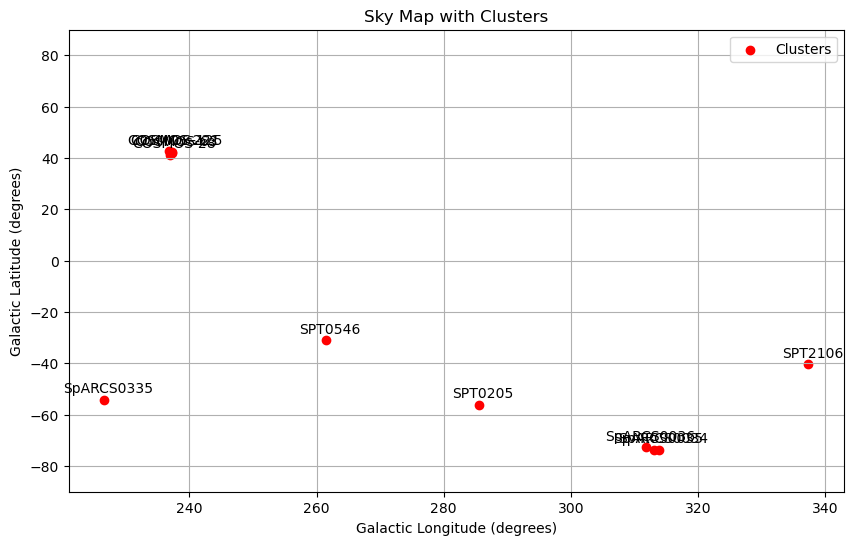

In [12]:
# From the 26 galaxies within the fits file for the GoGreen data we find that only 11 of them
# are within the observable region of eROSITA data. Next thing I wanted to do
# was create a graph of latitude vs longitude with the clusters names attached


clusters = ['COSMOS-125', 'COSMOS-221', 'COSMOS-28', 'COSMOS-63', 'SPT0205', 'SPT0546', 'SPT2106',
            'SpARCS0035', 'SpARCS0335', 'SpARCS0034', 'SpARCS0036']
galactic_longitude = [237.25914404812224, 236.84214956654304, 236.90259780484317, 237.3072002343638,
                       285.55867279316857, 261.4740302884961, 337.38033141348274, 313.0593632277148,
                       226.54191062277545, 313.8296982979513, 311.8133896530781]
galactic_latitude = [42.50681286630174, 42.65447312454607, 41.28073874299793, 42.15874307369241,
                      -56.06857671047569, -30.97937940140743, -40.222438231055, -73.61335126262414,
                      -54.09186387672532, -73.64079953582157, -72.69358424918588]

# Plot the sky map
plt.figure(figsize=(10, 6))
plt.scatter(galactic_longitude, galactic_latitude, label='Clusters', color='red', marker='o')

# Annotate each point with the cluster name
for i, cluster in enumerate(clusters):
    plt.annotate(cluster, (galactic_longitude[i], galactic_latitude[i]), textcoords="offset points", xytext=(3,5), ha='center')

plt.xlabel('Galactic Longitude (degrees)')
plt.ylabel('Galactic Latitude (degrees)')
plt.title('Sky Map with Clusters')
plt.ylim(-90, 90)
plt.grid(True)
plt.legend()
plt.savefig('Sky Map With Clusters')
plt.show()

The graph is plotted with the y-axis as the Galactic latitude (in degrees from -90 to 90) vs the x-axis which is the Galactic Longitude (in degrees from 180 to 360). I plotted this graph to show the 11 clusters found from the GoGreen survey that should be within the eROSITA data that we will be working with in the next Jupyter notebook. As we can see from the graphs the Cosmo clusters and the SpARC clusters tend to overlap.
